In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Load the dataset into python environment

In [14]:
titanic=pd.read_csv(r'C:\Users\user\Downloads\titanic_dataset.csv')

In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Make ‘PassengerId’ as the index column 

In [17]:
titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Check the basic details of the dataset 

In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Fill in all the missing values present in all the columns in the dataset 

In [19]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
for i in ['Age']:
    titanic[i]=titanic[i].fillna(titanic[i].median())

In [21]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace = True)

In [23]:
titanic.drop(['Cabin'],axis=1,inplace=True)
#dropping cabin column as there is a huge number of null columns

In [24]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Survived')

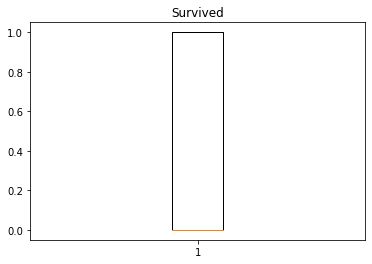

In [33]:
plt.boxplot(titanic['Survived'])
plt.title('Survived')


Text(0.5, 1.0, 'Pclass')

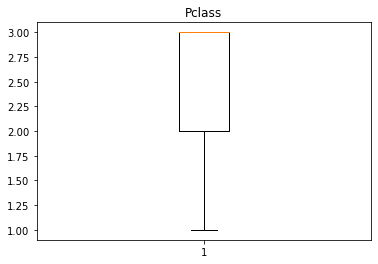

In [34]:
plt.boxplot(titanic['Pclass'])
plt.title('Pclass')

Text(0.5, 1.0, 'Age')

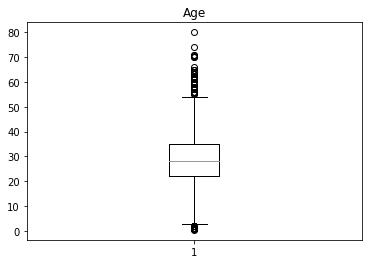

In [35]:
plt.boxplot(titanic['Age'])
plt.title('Age')

In [36]:
#outliers present

Text(0.5, 1.0, 'SibSp')

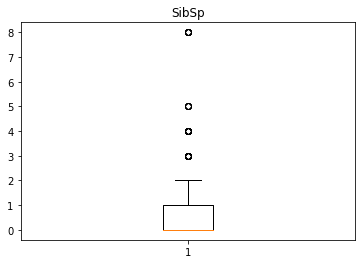

In [37]:
plt.boxplot(titanic['SibSp'])
plt.title('SibSp')

In [38]:
#outliers present

Text(0.5, 1.0, 'Fare')

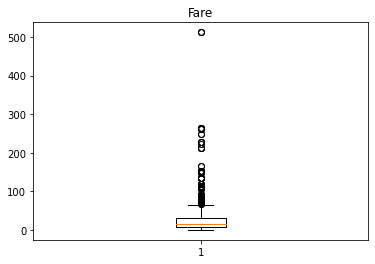

In [40]:
plt.boxplot(titanic['Fare'])
plt.title('Fare')

In [41]:
#outliers present

##### Managing outliers in age 

In [42]:
Q1=np.percentile(titanic['Age'],25,interpolation='midpoint')
Q2=np.percentile(titanic['Age'],50,interpolation='midpoint')
Q3=np.percentile(titanic['Age'],75,interpolation='midpoint')

In [43]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR

In [44]:
outlier_age=[]
for x in titanic['Age']:
    if((x>Up_limit) or (x<low_limit)):
        outlier_age.append(x)

In [45]:
print(outlier_age)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [46]:
ind_age=titanic['Age'][(titanic['Age']>Up_limit)|(titanic['Age']<low_limit)].index
titanic.loc[ind_age].index

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')

In [47]:
titanic.drop([7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],inplace=True)

##### Managing outliers in SibSp

In [48]:
Q1=np.percentile(titanic['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(titanic['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(titanic['SibSp'],75,interpolation='midpoint')

In [49]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR

In [50]:
print(IQR)

1.0


In [51]:
outlier_SibSp=[]
for x in titanic['SibSp']:
    if((x>Up_limit) or (x<low_limit)):
        outlier_SibSp.append(x)

In [52]:
print(outlier_SibSp)

[3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [53]:
ind_sibsp=titanic['SibSp'][(titanic['SibSp']>Up_limit)|(titanic['SibSp']<low_limit)].index
titanic.loc[ind_sibsp].index

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [54]:
titanic.drop([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],inplace=True)

##### Managing outliers in Fare

In [56]:
Q1=np.percentile(titanic['Fare'],25,interpolation='midpoint')
Q2=np.percentile(titanic['Fare'],50,interpolation='midpoint')
Q3=np.percentile(titanic['Fare'],75,interpolation='midpoint')

In [57]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR
print(IQR)

19.8542


In [58]:
outlier_fare=[]
for x in titanic['Fare']:
    if((x>Up_limit) or (x<low_limit)):
        outlier_fare.append(x)

In [59]:
print(outlier_fare)

[71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [60]:
ind_fare=titanic['Fare'][(titanic['Fare']>Up_limit)|(titanic['Fare']<low_limit)].index
titanic.loc[ind_fare].index

Int64Index([  1,  31,  34,  52,  61,  62,  72,  92,  97, 102,
            ...
            759, 763, 765, 779, 789, 802, 820, 835, 849, 856],
           dtype='int64', length=102)

In [61]:
titanic.drop(titanic.loc[ind_fare].index,inplace=True)

###  Do min max scaling on the feature set (Take ‘Survived’ as target)

In [62]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [63]:
from sklearn import preprocessing
minMax = preprocessing.MinMaxScaler(feature_range=(0,1))

In [64]:
x = titanic.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)
y = titanic['Survived']

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [66]:
from sklearn import linear_model

In [67]:
lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [70]:
print("mean_squared_error= ",mean_squared_error(ytest,predictions))
print("r2_score= ",r2_score(ytest,predictions))

mean_squared_error=  0.19528299301279517
r2_score=  0.1243988304211292


In [71]:
x = titanic.drop(['Survived','Name','Sex','Ticket','Embarked'],axis =1)

In [72]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,451.592105,2.504386,28.612573,0.271930,0.267544,16.317275
std,258.938313,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,223.750000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,450.500000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.250000,3.000000,33.000000,0.000000,0.000000,23.062500
max,891.000000,3.000000,54.000000,2.000000,6.000000,57.000000


In [73]:
x = minMax.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.506283,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.290942,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250281,0.500000,0.392157,0.000000,0.000000,0.137793
50%,0.505056,1.000000,0.490196,0.000000,0.000000,0.184211
75%,0.757584,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=42,test_size=0.2)

In [75]:
lr = linear_model.LinearRegression()
model = lr.fit(xtrain,ytrain)
predictions = model.predict(xtest)

In [76]:
print("mean_squared_error=",mean_squared_error(ytest,predictions))
print("r2_score",r2_score(ytest,predictions))

mean_squared_error= 0.19528299301279517
r2_score 0.1243988304211292


In [77]:
#There is no variation after scaling